In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv("youtube_multi_channel_data.csv")

In [13]:
data.head()

,channel_title,video_title,views,likes,comments,published_date
0,sentdex,"Unitree G1 LiDAR, SLAM, navigation and control...",35941,1157,235,4/30/2025
1,sentdex,Programming with LLM Agents in 2025,107985,3787,283,2/16/2025
2,sentdex,Visualizing Neural Network Internals,51530,1442,51,2/14/2024
3,sentdex,OpenAI GPT-4 Function Calling: Unlimited Poten...,230489,4782,320,6/15/2023
4,sentdex,OpenAI's ChatGPT is a MASSIVE step forward in ...,471597,11540,980,12/10/2022


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   channel_title   2596 non-null   object
 1   video_title     2596 non-null   object
 2   views           2596 non-null   int64 
 3   likes           2596 non-null   int64 
 4   comments        2596 non-null   int64 
 5   published_date  2596 non-null   object
dtypes: int64(3), object(3)
memory usage: 121.8+ KB


In [15]:
data.describe()

,views,likes,comments
count,2.596000e+03,2.596000e+03,2596.000000
mean,4.689732e+05,1.398393e+04,438.486903
std,1.903547e+06,6.868334e+04,1204.784978
min,0.000000e+00,0.000000e+00,0.000000
25%,7.195750e+03,1.862500e+02,9.750000
50%,4.039800e+04,1.096000e+03,66.500000
75%,2.147742e+05,5.651000e+03,368.250000
max,6.324260e+07,2.685969e+06,24724.000000


Median << Mean	Strongly suggests non-Gaussian distribution

Highly Skewed Distribution (Right skew)
The mean is much higher than the median for all 3 metrics, especially views and likes.

This suggests a few videos have gone very viral, inflating the averages.

c:\Users\dhars\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\dhars\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\dhars\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


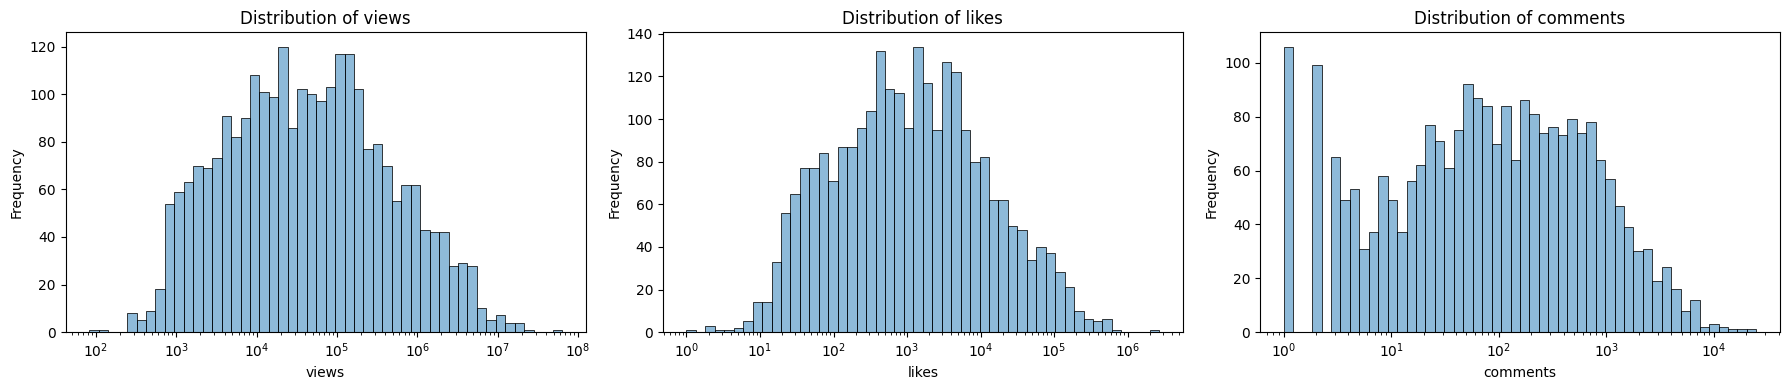

In [16]:
metrics = ['views', 'likes', 'comments']
plt.figure(figsize=(18, 4))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[metric], bins=50, kde=True, log_scale=True)
    plt.title(f"Distribution of {metric}")
    plt.xlabel(metric)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


VIEWS:

--> The distribution is right-skewed 

--> Most videos have between 10,000 and 1 million views

--> The majority of videos have moderate to low view counts

--> A few viral videos dominate the view totals
LIKES:

-->  right-skewed.

--> Ranges from ~1 to over 1 million likes

--> Follows a power-law-like distribution: a few videos get a lot of likes

COMMENTS:

-->Right-skewed.

-->Most Frequent Range: 10–500 comments

Apply Log Transformation for Better Visuals

In [27]:
import numpy as np

data['log_views'] = np.log1p(data['views'])        # log1p = log(1 + x), handles 0s
data['log_likes'] = np.log1p(data['likes'])
data['log_comments'] = np.log1p(data['comments'])

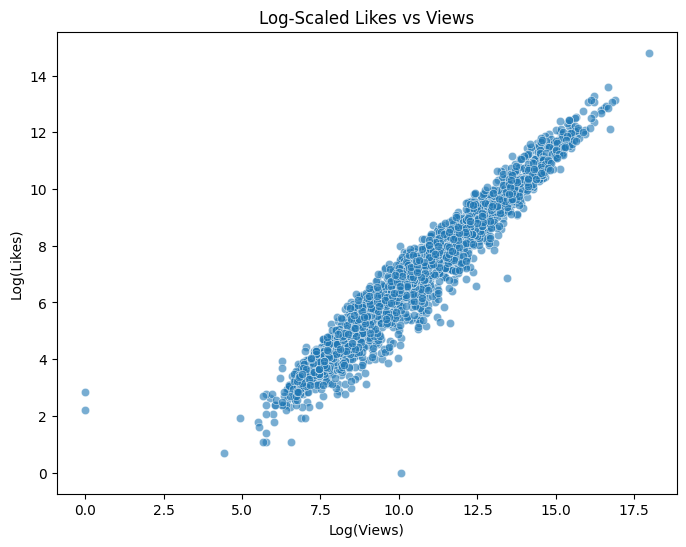

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='log_views', y='log_likes', data=data, alpha=0.6)
plt.title('Log-Scaled Likes vs Views')
plt.xlabel('Log(Views)')
plt.ylabel('Log(Likes)')
plt.show()

There is a strong, positive linear correlation between the log of views and the log of likes.

This indicates that as view counts increase, likes also increase

Text(0.5, 1.0, 'Like-to-View Ratio Distribution')

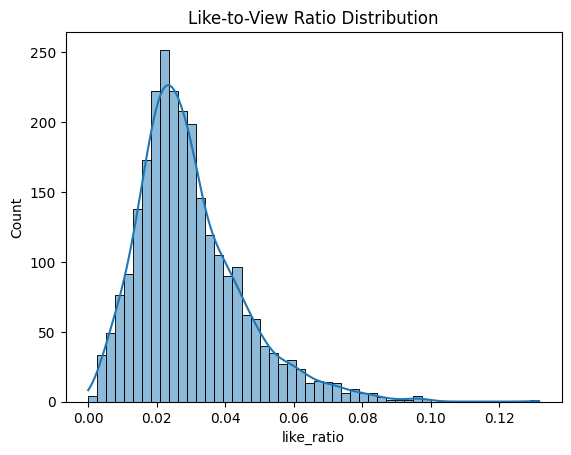

In [29]:
data['like_ratio'] = data['likes'] / data['views']
sns.histplot(data['like_ratio'], bins=50, kde=True)
plt.title('Like-to-View Ratio Distribution')

Text(0.5, 1.0, 'Average Views, Likes, Comments per Channel')

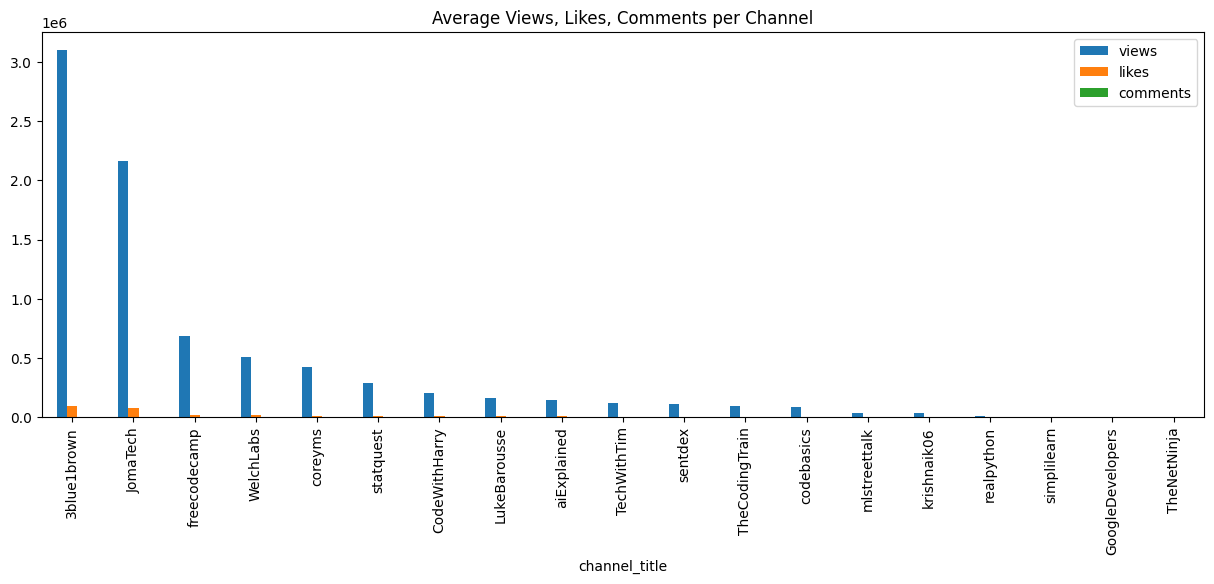

In [30]:
engagement = data.groupby('channel_title')[['views', 'likes', 'comments']].mean().sort_values('views', ascending=False)
engagement[['views', 'likes', 'comments']].plot(kind='bar', figsize=(15,5))
plt.title("Average Views, Likes, Comments per Channel")


In [21]:
top_channels_by_views = (
    data.groupby('channel_title')['views']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print(top_channels_by_views)

    channel_title      views
0     3blue1brown  660384407
1        JomaTech  190359647
2         coreyms  102484537
3       statquest   78038580
4       WelchLabs   64594563
5    LukeBarousse   26518513
6      codebasics   21161186
7     aiExplained   17422934
8         sentdex   16291275
9  TheCodingTrain   15352245


C:\Users\dhars\AppData\Local\Temp\ipykernel_4408\196845272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views', y='channel_title', data=top_channels_by_views, palette='Blues_d')


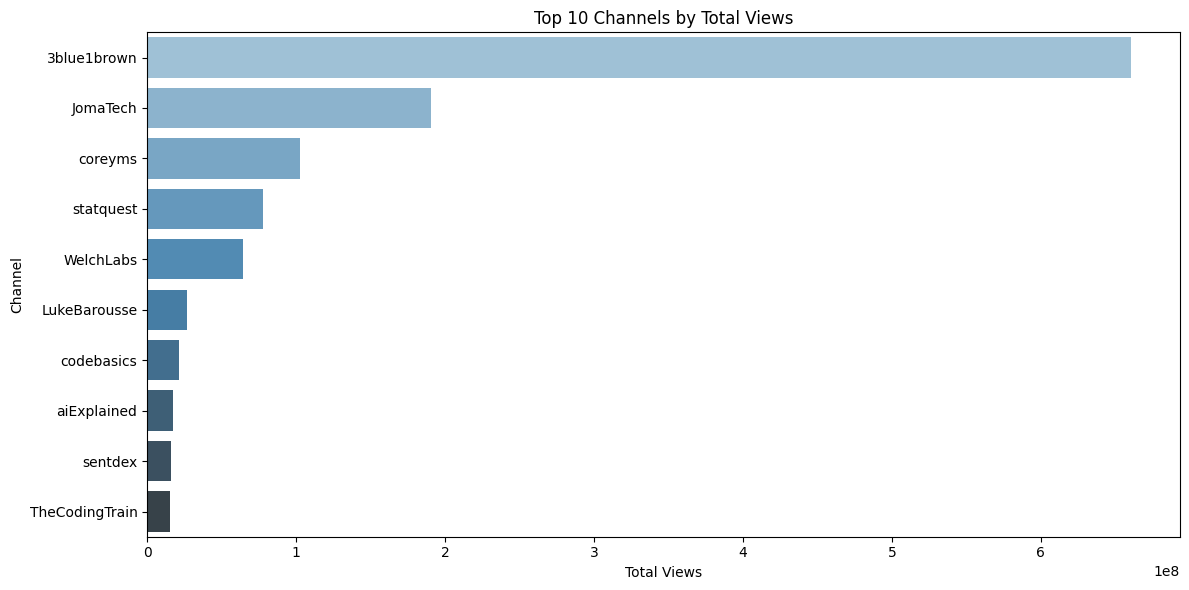

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='views', y='channel_title', data=top_channels_by_views, palette='Blues_d')
plt.title('Top 10 Channels by Total Views')
plt.xlabel('Total Views')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()

In [23]:
top_views = data.sort_values(by='views', ascending=False).head(10)
print("📺 Top 10 Videos by Views:")
print(top_views[['channel_title', 'video_title', 'views']])

📺 Top 10 Videos by Views:
     channel_title                                        video_title  \
2396   3blue1brown                   I'm still astounded this is true   
2246      JomaTech  a day in the life of an engineer working from ...   
2479   3blue1brown  But what is a neural network? | Deep learning ...   
2450   3blue1brown  But what is a Fourier series?  From heat flow ...   
2484   3blue1brown                But how does bitcoin actually work?   
2395   3blue1brown                             Don't let it fool you!   
2475   3blue1brown            The hardest problem on the hardest test   
2257      JomaTech     how we write/review code in big tech companies   
2456   3blue1brown    The most unexpected answer to a counting puzzle   
2382   3blue1brown                                   Order from chaos   

         views  
2396  63242604  
2246  21934004  
2479  19756330  
2450  18352770  
2484  17068665  
2395  17046255  
2475  15987454  
2257  15222490  
2456  13924431  


In [24]:
top_likes = data.sort_values(by='likes', ascending=False).head(10)
print("👍 Top 10 Videos by Likes:")
print(top_likes[['channel_title', 'video_title', 'likes']])


👍 Top 10 Videos by Likes:
     channel_title                                        video_title    likes
2396   3blue1brown                   I'm still astounded this is true  2685969
2395   3blue1brown                             Don't let it fool you!   805921
2256      JomaTech                        If Programming Was An Anime   579366
2375   3blue1brown                              The Newton art puzzle   501527
2246      JomaTech  a day in the life of an engineer working from ...   500576
2367   3blue1brown          The medical test paradox (well "paradox")   479446
2479   3blue1brown  But what is a neural network? | Deep learning ...   477130
2251      JomaTech                  why you NEED math for programming   465512
2475   3blue1brown            The hardest problem on the hardest test   409744
2484   3blue1brown                But how does bitcoin actually work?   385924


In [25]:
top_comments = data.sort_values(by='comments', ascending=False).head(10)
print("💬 Top 10 Videos by Comments:")
print(top_comments[['channel_title', 'video_title', 'comments']])


💬 Top 10 Videos by Comments:
     channel_title                                        video_title  \
2484   3blue1brown                But how does bitcoin actually work?   
2475   3blue1brown            The hardest problem on the hardest test   
2256      JomaTech                        If Programming Was An Anime   
2246      JomaTech  a day in the life of an engineer working from ...   
2396   3blue1brown                   I'm still astounded this is true   
2251      JomaTech                  why you NEED math for programming   
2245      JomaTech                     if Apple made window blinds...   
2414   3blue1brown            Solving Wordle using information theory   
2472   3blue1brown  But what is the Fourier Transform?  A visual i...   
2479   3blue1brown  But what is a neural network? | Deep learning ...   

      comments  
2484     24724  
2475     20183  
2256     15563  
2246     12665  
2396     12216  
2251     10063  
2245      9711  
2414      9064  
2472      8956

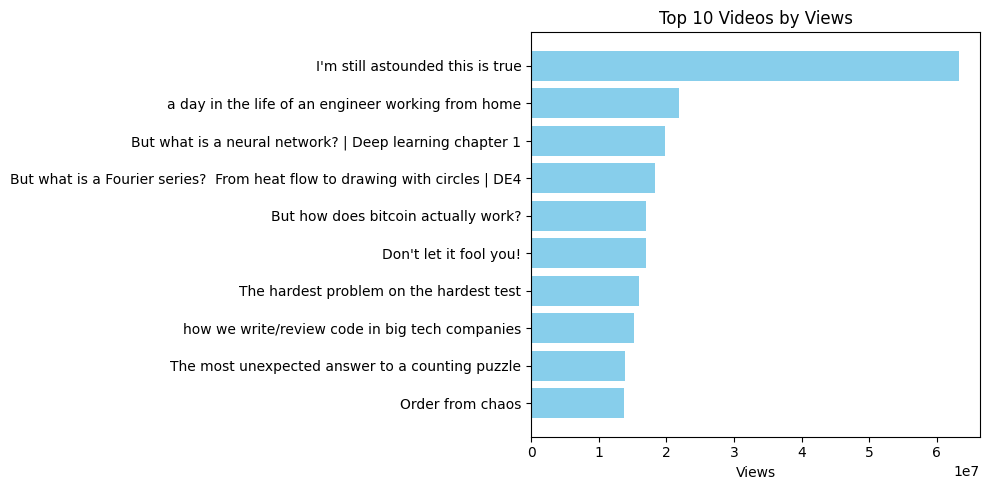

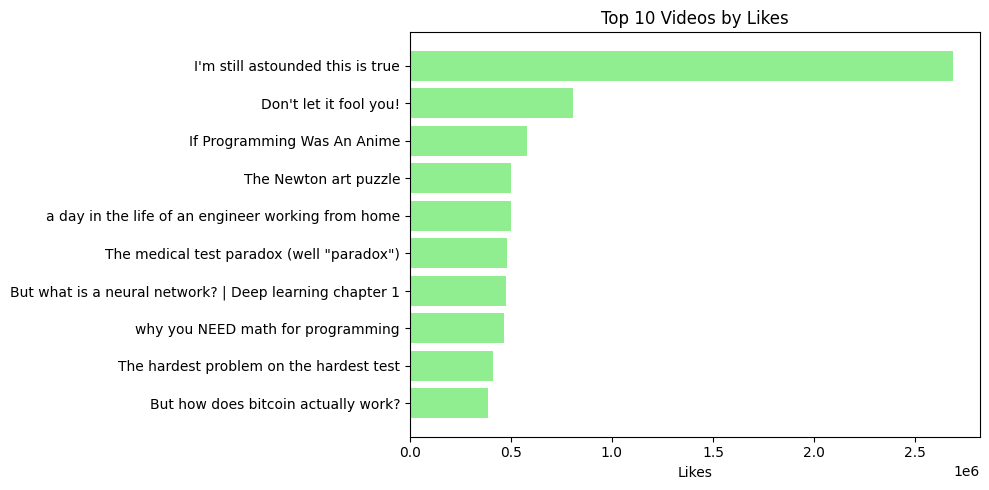

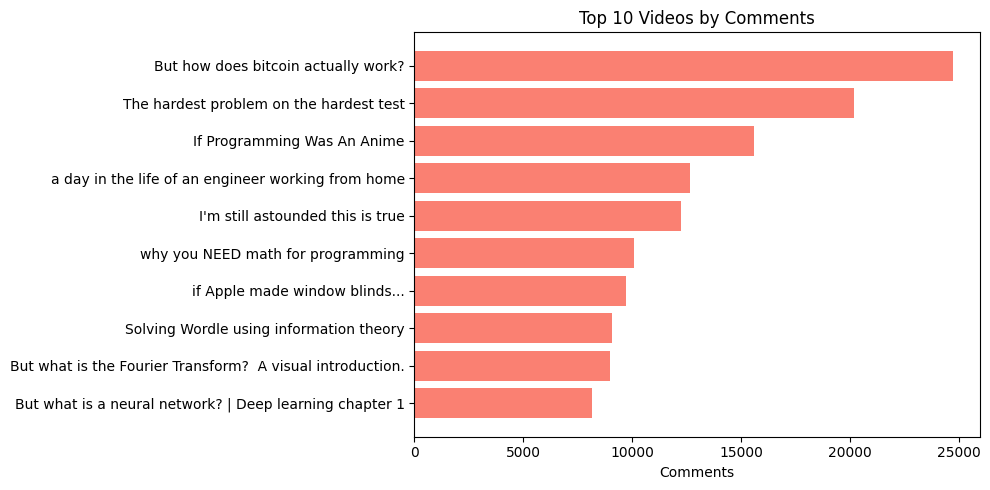

In [26]:
# Plot top views
plt.figure(figsize=(10, 5))
plt.barh(top_views['video_title'], top_views['views'], color='skyblue')
plt.title('Top 10 Videos by Views')
plt.xlabel('Views')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot top likes
plt.figure(figsize=(10, 5))
plt.barh(top_likes['video_title'], top_likes['likes'], color='lightgreen')
plt.title('Top 10 Videos by Likes')
plt.xlabel('Likes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot top comments
plt.figure(figsize=(10, 5))
plt.barh(top_comments['video_title'], top_comments['comments'], color='salmon')
plt.title('Top 10 Videos by Comments')
plt.xlabel('Comments')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


C:\Users\dhars\AppData\Local\Temp\ipykernel_4408\712393229.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('published_date').resample('M')['views'].sum().plot()


Text(0, 0.5, 'Views')

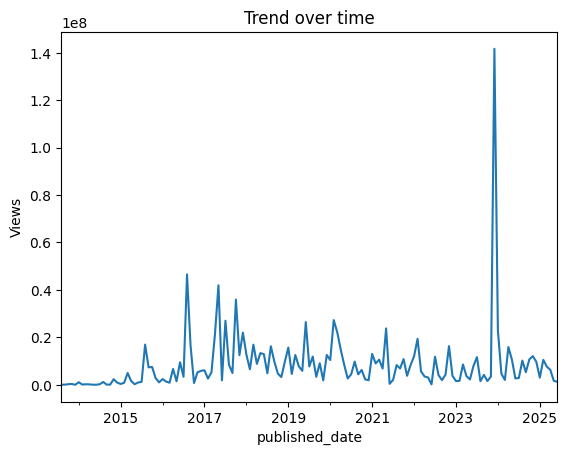

In [33]:
data['published_date'] = pd.to_datetime(data['published_date'])
data.set_index('published_date').resample('M')['views'].sum().plot()
plt.title('Trend over time')
plt.ylabel('Views')


C:\Users\dhars\AppData\Local\Temp\ipykernel_4408\1987523077.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='day', y='views', order=day_order, estimator='mean', ci=None, palette='viridis')
C:\Users\dhars\AppData\Local\Temp\ipykernel_4408\1987523077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='day', y='views', order=day_order, estimator='mean', ci=None, palette='viridis')


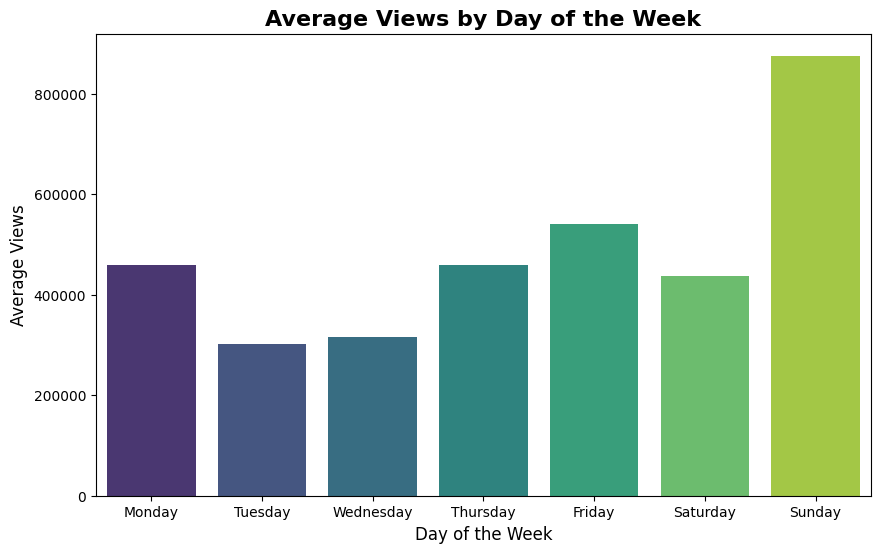

In [36]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='day', y='views', order=day_order, estimator='mean', ci=None, palette='viridis')
plt.title('Average Views by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Views', fontsize=12)
plt.show()

Sunday is best to publish videos because the average views count in high on sunday